In [1]:
import pandas as pd
# import pandasql as ps
import matplotlib.pyplot as plt
# Import argsort
from numpy import argsort
from Functions.connection.connection import *
from Functions.AlertP1.data_cleaning import *
from Functions.AlertP1.features import *
from Functions.analysis.step_analysis import *
from Functions.AlertP1.dummy_features import *
from Functions.Models.Logistic_regression import *
from Functions.Models.evaluation import *
from Data_with_Meds import *

## Connection to databse

In [2]:
alertP1=connection("/Users/MarouanKamoun/Desktop/HGO pbl/credentials.csv")

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',), ('hgo_data_032023',)]
112


## Data cleaning

In [3]:
#changing columns with date to a datetime
date_format_alertP1(alertP1)
#change the blank values in proveniencia and priority to unknown
replace_blank(alertP1)
#merge duplicated entity
entity_duplicated(alertP1)
#create a column with the output of a referral and select the refused and accepted ones
alertP1=result(alertP1)

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

## Creating new columns for features 

In [4]:
class_area(alertP1)
text_length(alertP1)
medication_column(alertP1)
referral_steps(alertP1)
speciality(alertP1)
alertP1=unit(alertP1)
alertP1=alertP1.sort_values('DATA_RECEPCAO')
alertP1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MarouanKamoun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MarouanKamoun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\features.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['step'][alertP1['step']>=3]='3+'


,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,PROVENIENCIA,COD_CTH_PRIOR,CTH_PRIOR,...,result,area,text_length,clean_text,medication_level_1,medication_level_2,medication_level_3,step,speciality_type,unit
9915,SEAFHB,BBLVVLDC,LOHHHLOV,SFGHADG,3150305,UCSP RAINHA D. LEONOR,CS/USF,CTH,,unknown,...,1,inside area,0,,0,0,0,1,Other specialities,UCSP
6944,ZDGGGA,BMJNMVVJ,LOHHHHRS,,0,,OUTRA,unknown,,unknown,...,1,outside area,0,,0,0,0,1,General Neurology,HGO
6542,ZZZBGG,BMJIBILB,LOHHHOHO,SSBSEGA,3150301,FRANCISCO X NORONHA,CS/USF,CTH,,unknown,...,0,outside area,0,,0,0,0,1,General Neurology,UCSP
3067,DSHCGG,BMIBJIE,LOHHHOUQ,SFAAECF,3151672,USF AMORA SAUDAVEL,CS/USF,CTH,,unknown,...,1,inside area,0,,0,0,0,1,Other specialities,USF
2078,AESBSC,NINBJJC,LOHHHPTO,,0,,OUTRA,unknown,,unknown,...,1,outside area,0,,0,0,0,1,General Neurology,HGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,ZSGCCF,BMJCJLIJ,LSHVLHUO,ZEFHCECF,3150672,USF FEIJO-CS COVA DA PIEDADE,CS/USF,CTH,3,Normal,...,1,inside area,0,,0,0,0,2,General Neurology,USF
4044,CDABCC,VLNVILNB,LSHVLLUO,ZEFZDDBB,3150371,USF S JOAO DO PRAGAL-CS ALMADA,CS/USF,CTH,3,Normal,...,1,inside area,0,,0,0,0,1,General Neurology,USF
6424,FCDEF,BIJIMMIJ,LSHVLOQU,,0,,OUTRA,SAM,3,Normal,...,1,outside area,0,,0,0,0,2,Other specialities,HGO
9425,EBESGE,BDVDJJIB,LSHVLLVV,,0,,OUTRA,SAM,,unknown,...,1,outside area,0,,0,0,0,1,Other specialities,HGO


## structured data with dummies

In [5]:
data=structured_data_dummies(alertP1)
print(data.columns)
data

Index([          'ID_DOENTE',            'PROCESSO',      'COD_REFERENCIA',
                    'COD_PZ', 'COD_UNID_SAUDE_PROV',           'UNID_PROV',
                 'TIPO_UNID',       'COD_CTH_PRIOR',           'CTH_PRIOR',
         'COD_MOTIVO_RECUSA',   'DES_MOTIVO_RECUSA',   'COD_ESPECIALIDADE',
         'DES_ESPECIALIDADE',          'agrupadora',      'OUTRA_ENTIDADE',
             'DATA_RECEPCAO',          'DATA_ENVIO',        'DATA_RETORNO',
                  'NUM_TAXA',              'ESTADO',       'DATA_MARCACAO',
           'DATA_REALIZACAO',         'OBSERVACOES',         'Mês_entrada',
               'Ano_entrada',   'trata data recusa',        'resume saída',
                 'mês_saida',           'ano_saida',               'Texto',
                    'result',         'text_length',          'clean_text',
        'medication_level_1',  'medication_level_2',  'medication_level_3',
              'outside area',                 'SAM',                 'SON',
            

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,COD_CTH_PRIOR,CTH_PRIOR,COD_MOTIVO_RECUSA,...,outside area,SAM,SON,unknown,Other specialities,2,3+,HOSP,UCSP,USF
9915,SEAFHB,BBLVVLDC,LOHHHLOV,SFGHADG,3150305,UCSP RAINHA D. LEONOR,CS/USF,,unknown,0,...,0,0,0,0,1,0,0,0,1,0
6944,ZDGGGA,BMJNMVVJ,LOHHHHRS,,0,,OUTRA,,unknown,0,...,1,0,0,1,0,0,0,0,0,0
6542,ZZZBGG,BMJIBILB,LOHHHOHO,SSBSEGA,3150301,FRANCISCO X NORONHA,CS/USF,,unknown,7,...,1,0,0,0,0,0,0,0,1,0
3067,DSHCGG,BMIBJIE,LOHHHOUQ,SFAAECF,3151672,USF AMORA SAUDAVEL,CS/USF,,unknown,0,...,0,0,0,0,1,0,0,0,0,1
2078,AESBSC,NINBJJC,LOHHHPTO,,0,,OUTRA,,unknown,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,ZSGCCF,BMJCJLIJ,LSHVLHUO,ZEFHCECF,3150672,USF FEIJO-CS COVA DA PIEDADE,CS/USF,3,Normal,0,...,0,0,0,0,0,1,0,0,0,1
4044,CDABCC,VLNVILNB,LSHVLLUO,ZEFZDDBB,3150371,USF S JOAO DO PRAGAL-CS ALMADA,CS/USF,3,Normal,0,...,0,0,0,0,0,0,0,0,0,1
6424,FCDEF,BIJIMMIJ,LSHVLOQU,,0,,OUTRA,3,Normal,0,...,1,1,0,0,1,1,0,0,0,0
9425,EBESGE,BDVDJJIB,LSHVLLVV,,0,,OUTRA,,unknown,0,...,1,1,0,0,1,0,0,0,0,0


## Logistic regression text variables

In [16]:
#logistic regression text rows
data_no_text=data[data['text_length']>0]
#split dataset in features and target variable// Question: is it the right option?
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text']
X = data_no_text.drop(eliminate_cols,axis=1)# Features
y = data_no_text.result # Target variable
features=X.columns
#log_regression is defined in functions
y_pred,coefficients,intercept,X_train, X_test, y_train, y_test=log_regression(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df


c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,coefficients
0,text_length,0.001521
1,medication_level_1,0.218732
2,medication_level_2,0.162664
3,medication_level_3,-0.482829
4,outside area,0.533670
5,SAM,-0.293364
6,SON,-0.210821
7,unknown,-1.190567
8,Other specialities,3.219674
9,2,0.220717


In [17]:
y_df = pd.DataFrame(y_test)
distribution = y_df["result"].value_counts()
distribution

1    211
0    111
Name: result, dtype: int64

metrics

Accuracy: 0.7049689440993789
Recall: 0.5912855983946032
Precision: 0.7183415032679739
              precision    recall  f1-score   support

     refused       0.74      0.23      0.34       111
    accepted       0.70      0.96      0.81       211

    accuracy                           0.70       322
   macro avg       0.72      0.59      0.58       322
weighted avg       0.71      0.70      0.65       322



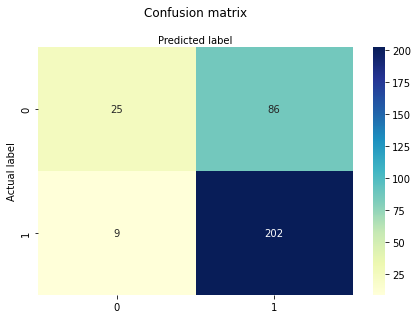

In [18]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

In [19]:
p_value(X,y)

,Feature,p_value
0,text_length,1.491237e-30
1,medication_level_1,3.032071e-05
2,medication_level_2,3.514214e-05
3,medication_level_3,5.774839e-03
4,outside area,1.106719e-27
5,SAM,1.051842e-04
6,SON,7.611581e-04
7,unknown,2.499057e-31
8,Other specialities,4.704782e-23
9,2,4.632841e-02


## Logistic without high p-value

In [ ]:
#logistic regression text rows
data_no_text=data[data['text_length']>0]
#split dataset in features and target variable// Question: is it the right option?
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','UCSP','3+']
X = data_no_text.drop(eliminate_cols,axis=1)# Features
y = data_no_text.result # Target variable
features=X.columns
#log_regression is defined in functions
y_pred,coefficients,intercept,X_train, X_test, y_train, y_test=log_regression(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df

In [ ]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)
# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))


In [ ]:
p_value(X,y)
